# STATS 161 Homework 5

## 1. Kernel Density Estimation

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from sklearn.neighbors import KernelDensity

### (a)

In [2]:
np.random.seed(1)
N = 100
X = np.concatenate((np.random.normal(-2, 1.5, int(0.6 * N)), 
                    np.random.normal(3, 1.5, int(0.4 * N))))[:, np.newaxis]

### (b)

Text(0.5, 1.0, 'Gaussian Kernel Density')

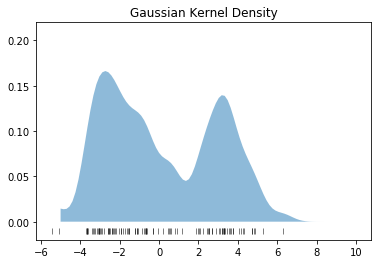

In [3]:
X_plot = np.linspace(-5, 10, N)[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
log_dens = kde.score_samples(X_plot)

plt.fill_between(X_plot[:, 0], np.exp(log_dens), alpha=0.5)
plt.plot(X, np.full_like(X, -0.01), '|k', markeredgewidth=0.5)
plt.ylim(-0.02, 0.22)
plt.title("Gaussian Kernel Density")

### (c)

h=2 estimates underfit and h=0.1 estimates overfit.


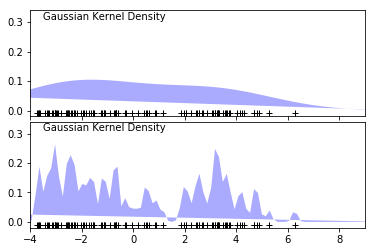

In [4]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# Gaussian KDE with h=2
kde2 = KernelDensity(kernel='gaussian', bandwidth=2).fit(X)
log_dens2 = kde2.score_samples(X_plot)
ax[0].fill(X_plot, np.exp(log_dens2), fc='#AAAAFF')
ax[0].text(-3.5, 0.31, "Gaussian Kernel Density")

# Gaussian KDE with h=0.1
kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X)
log_dens0 = kde0.score_samples(X_plot)
ax[1].fill(X_plot, np.exp(log_dens0), fc='#AAAAFF')
ax[1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X, np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

print("h=2 estimates underfit and h=0.1 estimates overfit.")

## 2. 

In [5]:
def K(gamma, x, xprime):
    return np.exp(-gamma * (x - xprime)**2)

xx = np.linspace(-2, 5, 100)
x2 = np.array([0, 1, 2, 3])
y2 = np.array([1, -1, 1, -1])

### (a)

Text(-1.5, 0.41, 'x vs. yhat')

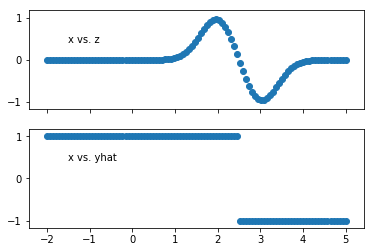

In [6]:
alpha_a = np.array([0,0,1,1])
z_a = np.zeros(len(xx))
y_hat = np.zeros(len(xx))

for i in range(len(xx)):
    for j in range(len(x2)):
        z_a[i] += alpha_a[j]*y2[j]*K(3, x2[j], xx[i])
    
    if z_a[i] > 0:
        y_hat[i] = 1
    else:
        y_hat[i] = -1
   
        
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
ax[0].scatter(xx, z_a)
ax[0].text(-1.5, 0.41, "x vs. z") 
ax[1].scatter(xx, y_hat)
ax[1].text(-1.5, 0.41, "x vs. yhat") 

Text(-1.5, 0.41, 'x vs. yhat')

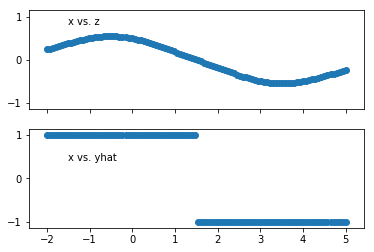

In [7]:
alpha_b = np.array([1,1,1,1])
z_b = np.zeros(len(xx))
y_hat2 = np.zeros(len(xx))

for i in range(len(xx)):
    for j in range(len(x2)):
        z_b[i] += alpha_b[j]*y2[j]*K(0.3, x2[j], xx[i])
      
    if z_b[i] > 0:
        y_hat2[i] = 1
    else:
        y_hat2[i] = -1
    
        
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
ax[0].scatter(xx, z_b)
ax[0].text(-1.5, 0.81, "x vs. z") 
ax[1].scatter(xx, y_hat2)
ax[1].text(-1.5, 0.41, "x vs. yhat") 

### (c)

The second classifier makes more errors on the training data because it has smaller gamma.

# 3

### (a)

 Number of hidden units : 2   
Number of output units : 1

### (b)

$$\underset{N\times 2}{\mathbf{z}^{H}} =  \underset{N\times 1}{\mathbf{X}} \underset{1 \times 2}{\mathbf{W}^{H}} + \underset{N\times 1}{\mathbf{J}}\underset{1\times 2}{\mathbf{b}^{H}} $$

Where J is a matrix of 1s so that the bias values in 'b' can be added to all rows.

$${\mathbf{z_1}^{H}} =  {1*\mathbf{x}}  - {1} $$

$${\mathbf{z_2}^{H}} =  {1*\mathbf{x}}  - {3} $$

### (c)

$${\mathbf{u}^{H}} =  {\mathbf{g_a}}({\mathbf{X}} {\mathbf{W}^{H}} + {\mathbf{J}}{\mathbf{b}^{H}}) $$

$${\mathbf{u_1}^{H}} =  {\mathbf{g_a}}({1*\mathbf{x}}  - {1}) $$

$${\mathbf{u_2}^{H}} =  {\mathbf{g_a}}({1*\mathbf{x}}  - {3}) $$

### (d)

$$\underset{N\times 1}{\mathbf{z}^{O}} =  \underset{N\times 2}{\mathbf{{\mathbf{g_a}}({\mathbf{X}} {\mathbf{W}^{H}} + {\mathbf{J}}{\mathbf{b}^{H}})}} \underset{2 \times 1}{\mathbf{W}^{O}} + \underset{N\times 1}{\mathbf{J}}\underset{1\times 1}{\mathbf{b}^{O}} $$

### (e)

$$\hat{\mathbf{y}} = {\mathbf{u}^{O}} =  {\mathbf{g_o}} ( \underset{N\times 2}{\mathbf{{\mathbf{g_a}}({\mathbf{X}} {\mathbf{W}^{H}} + {\mathbf{J}}{\mathbf{b}^{H}})}} \underset{2 \times 1}{\mathbf{W}^{O}} + \underset{N\times 1}{\mathbf{J}}\underset{1\times 1}{\mathbf{b}^{O}} ) $$

# 4

Text(0.5, 1.0, 'Continuous-valued Prediction')

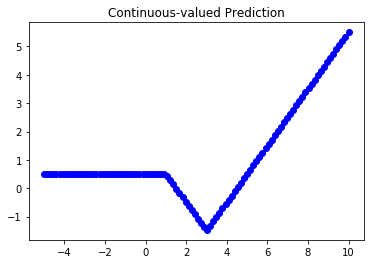

In [8]:
x4 = np.linspace(-5, 10, 100)
yhat = np.zeros([len(x4)])

def g_act(input):
    return np.max([0, input])

def g_out(input):
    return input

for i in range(len(x4)):
    z1 = x4[i] - 1
    z2 = x4[i] - 3
    u1 = g_act(z1)
    u2 = g_act(z2)
    
    zo = u1*(-1) + u2*2 + 0.5
    uo = g_out(zo)
    yhat[i] = uo

    
plt.plot(x4, yhat, 'bo')
plt.title("Continuous-valued Prediction")

# 5

In [9]:
x5 = np.array([0,1.3,2.1,2.8,4.2,5.7])
y5 = np.array([-1,-1,-1,1,-1,1])
t = np.linspace(0, 6, 100)

### (a)

In [10]:
J_t = np.zeros([100])

for i in range(len(t)):
    z = x5 - t[i]
    
    hinge = 1 - y5*z
    for each in hinge:
        J_t[i] += np.max([0, each])

### (b)

Text(0.5, 1.0, 'J(t) is minimized when t = 4.5')

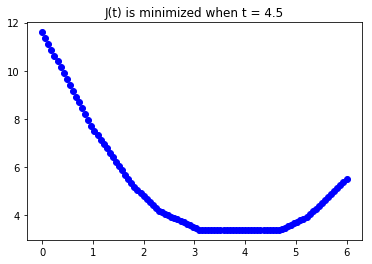

In [11]:
plt.plot(t, J_t, 'bo')
plt.title("J(t) is minimized when t = 4.5")

### (c)

In [12]:
z = x5 - 4.5
e = 1 - y5*z
print("The corresponding slack variables with the threshold t = 4.5")
print(e)

The corresponding slack variables with the threshold t = 4.5
[-3.5 -2.2 -1.4  2.7  0.7 -0.2]


### (d)

i = 5 violates the margin, and i = 4 is misclassified by the threshold that minimizes the sum of hinge loss.